In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
engine

Engine(sqlite:///hawaii.sqlite)

In [27]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f5efab3df0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [55]:
# Find the most recent date in the data set.
recentDate = session.query(func.max(Measurement.date)).first()
print(recentDate[0])

2017-08-23


In [56]:
#Determine the date range


datetime.datetime(2016, 8, 23, 0, 0)

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
dateRange = dt.datetime.strptime(recentDate[0], '%Y-%m-%d') - dt.timedelta(days=365)
dateRange

# Perform a query to retrieve the data and precipitation scores
rows = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dateRange).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(rows)
df.loc[:,'prcp'] =  df['prcp'].fillna(0)
prcpDF = df.groupby('date')['prcp'].mean() 

# Sort the dataframe by date
prcpDF.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data



date
2016-08-24    1.332857
2016-08-25    0.077143
2016-08-26    0.016667
2016-08-27    0.053333
2016-08-28    0.516667
                ...   
2017-08-19    0.022500
2017-08-20    0.003333
2017-08-21    0.145000
2017-08-22    0.166667
2017-08-23    0.132500
Name: prcp, Length: 365, dtype: float64

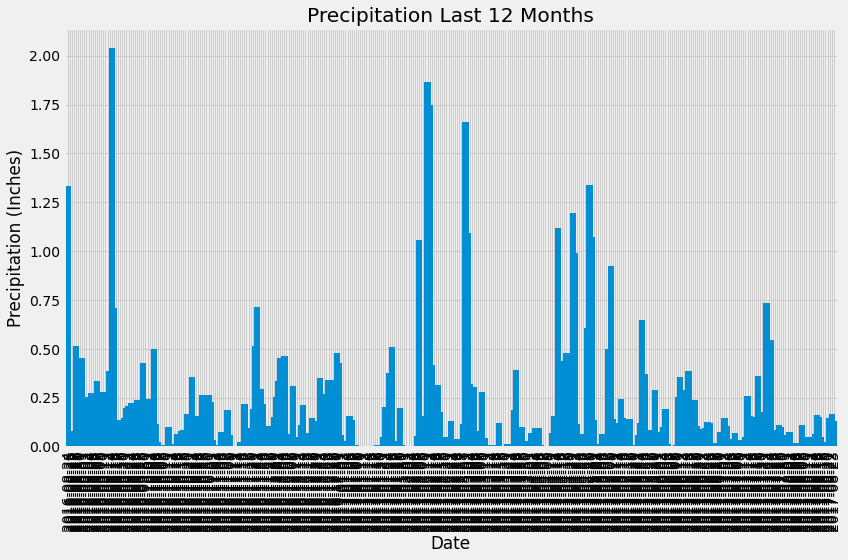

In [88]:
from matplotlib.dates import MonthLocator, DateFormatter
##########Need to fix this###############################
fig, ax = plt.subplots(figsize = (12, 8))
prcpDF.plot(kind='bar', width=3, ax = ax)

#prcpDF.plot(kind='bar', width=5, figsize=(12,8), x_compat=True)
plt.title("Precipitation Last 12 Months")
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017'])
#plt.xticks([])

plt.tight_layout()

plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [89]:
# Close Session
session.close()